# Syrah Tasting - Statistial Analysis
8 February 2021 - $Kacur

In [1]:
# load packages
import numpy as np  # array maniuplation
import pandas as pd  # dataframe mangagement
from scipy import stats  # to assist with statistical analysis
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # visual aesthetics
import ipystata  # to call stata from the notebook
%matplotlib inline

IPyStata is loaded in batch mode.


In [2]:
# load data
df_Nose = pd.read_excel('Syrah_Cleaned.xlsx', sheet_name='Nose')  # name a df by reading an excel sheet into pandas
df_Palate = pd.read_excel('Syrah_Cleaned.xlsx', sheet_name='Palate')  # be sure to specify sheet name

In [3]:
df_Nose.head()  # to display the first 5 rows of our dataframe

,Unnamed: 0,Taster,Wine,Country,Price,Ethanol,Gluc_Fruc,TA,pH,AV,...,tree_moss,truffle,mushroom,Wine_Faults,Cork_Taint,Reduction,Heat,VA,Sulfites,Brett
0,0,1,792,Morocco,15.5,13.44,0.5,3.28,3.66,0.44,...,0,0,0,0,0,0,0,0,0,0
1,1,1,580,New Zealand,21.7,12.67,0.5,3.70,3.62,0.61,...,0,0,0,0,0,0,0,0,0,0
2,2,1,189,Thailand,23.3,12.49,0.0,3.57,3.77,0.59,...,0,0,0,1,0,1,0,0,0,0
3,3,1,821,Italy,32.0,13.75,0.0,3.40,3.69,0.54,...,0,0,0,0,0,0,0,0,0,0
4,4,1,961,France,40.0,12.97,0.5,2.99,3.79,0.55,...,0,0,1,0,0,0,0,0,0,0


In [4]:
# we need to drop the unnamed index column that is left over from our data cleansing
df_Nose = df_Nose.drop(labels = 'Unnamed: 0', axis =1)
df_Palate = df_Palate.drop(labels = 'Unnamed: 0', axis=1)
df_Nose.head()

,Taster,Wine,Country,Price,Ethanol,Gluc_Fruc,TA,pH,AV,Malic_Acid,...,tree_moss,truffle,mushroom,Wine_Faults,Cork_Taint,Reduction,Heat,VA,Sulfites,Brett
0,1,792,Morocco,15.5,13.44,0.5,3.28,3.66,0.44,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,580,New Zealand,21.7,12.67,0.5,3.70,3.62,0.61,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,189,Thailand,23.3,12.49,0.0,3.57,3.77,0.59,0.0,...,0,0,0,1,0,1,0,0,0,0
3,1,821,Italy,32.0,13.75,0.0,3.40,3.69,0.54,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,961,France,40.0,12.97,0.5,2.99,3.79,0.55,0.0,...,0,0,1,0,0,0,0,0,0,0


## Profiling

In [5]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_Nose, title='Pandas Profiling Report: Nose', explorative=True)

In [6]:
#profile.to_widgets()

## Analysis of Tasters

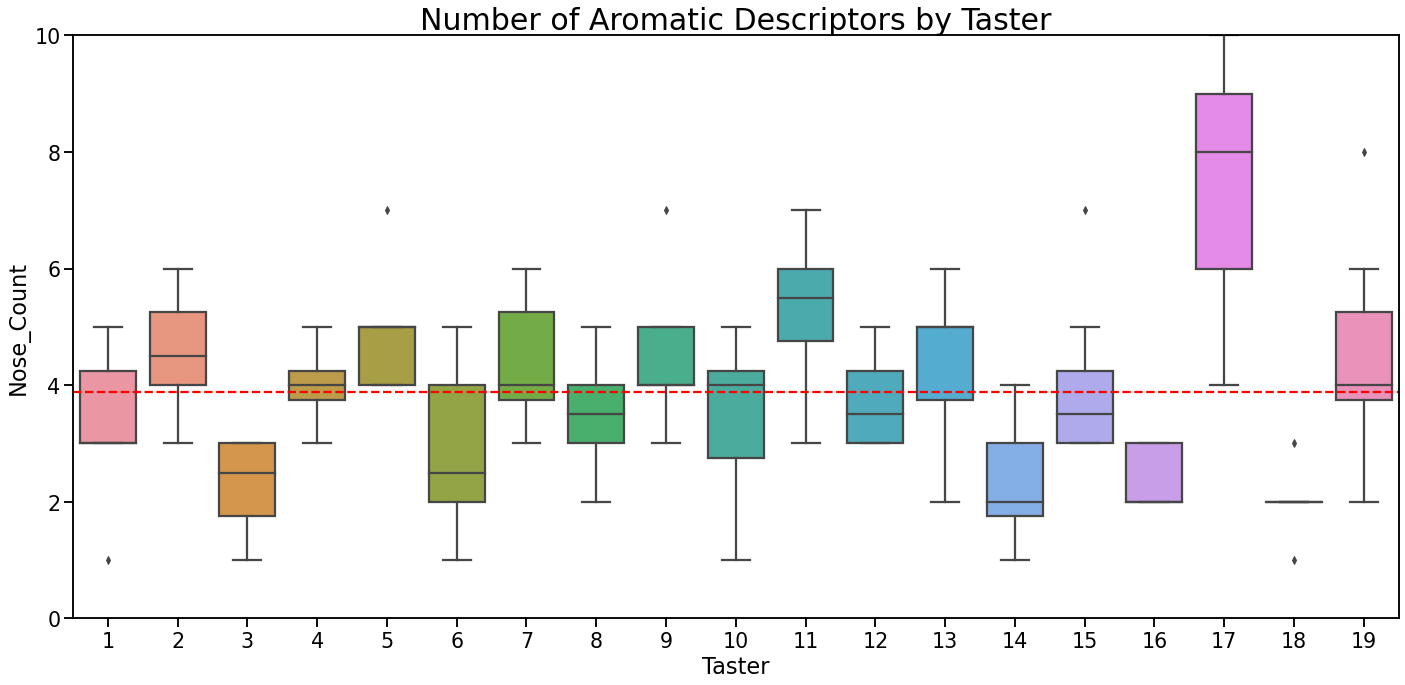

In [7]:
# let's start with a simple box plot to see how many words each taster used to describe aromatic characteristics
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(20,10))  # and set the figure size
ax.set(ylim=(0, 10))  # set the ylim to the same thing for both plots -- makes comparison easier
plt.title('Number of Aromatic Descriptors by Taster', fontsize='30')  # always a title
sns.boxplot(x=df_Nose['Taster'], y=df_Nose['Nose_Count'])
ax.axhline(df_Nose['Nose_Count'].mean(), ls='--', color='red')  # insert a line at 3.88 for the mean
plt.tight_layout()

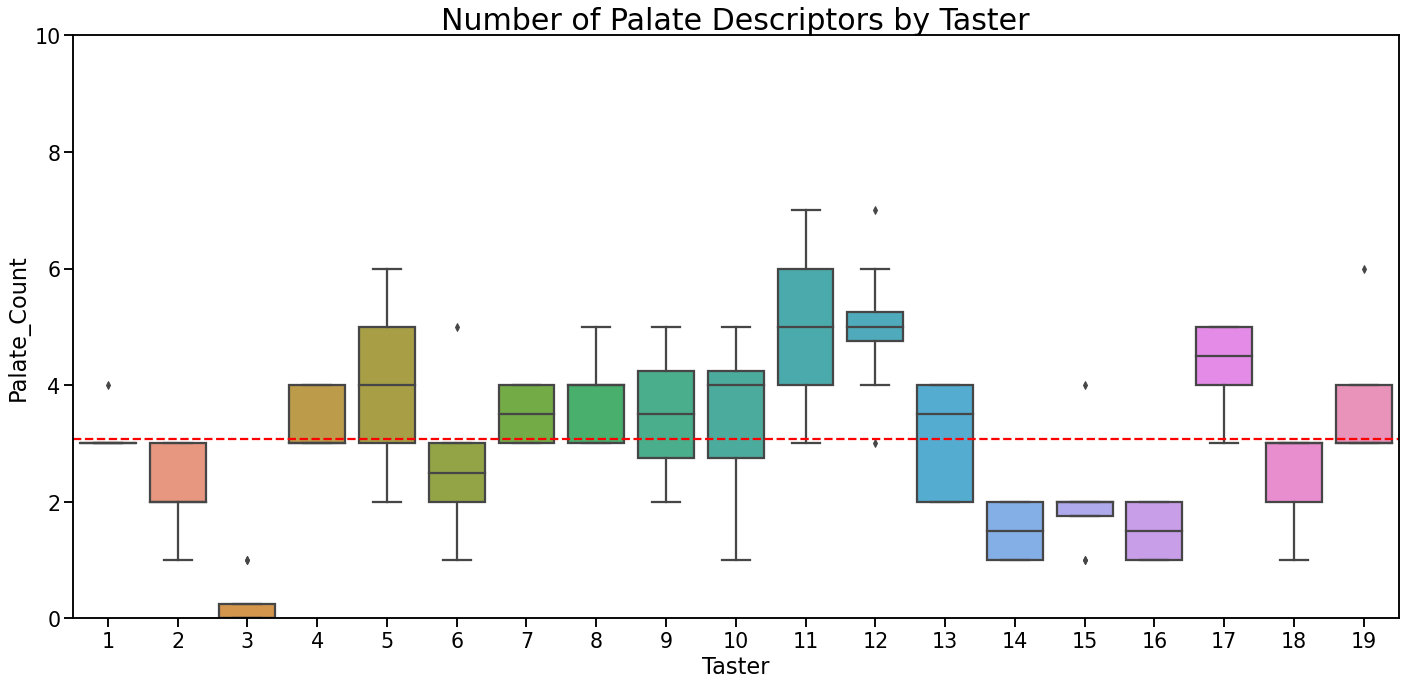

In [8]:
# now we can follow up with another boxplot to look at the number of terms each taster used to describe the palate
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(20,10))  # and set the figure size
ax.set(ylim=(0, 10))  # set the ylim to the same thing for both plots -- makes comparison easier
plt.title('Number of Palate Descriptors by Taster', fontsize='30')  # always a title
sns.boxplot(x=df_Palate['Taster'], y=df_Palate['Palate_Count'])
ax.axhline(df_Palate['Palate_Count'].mean(), ls='--', color='red')  # insert a line at 3.88 for the mean
plt.tight_layout()

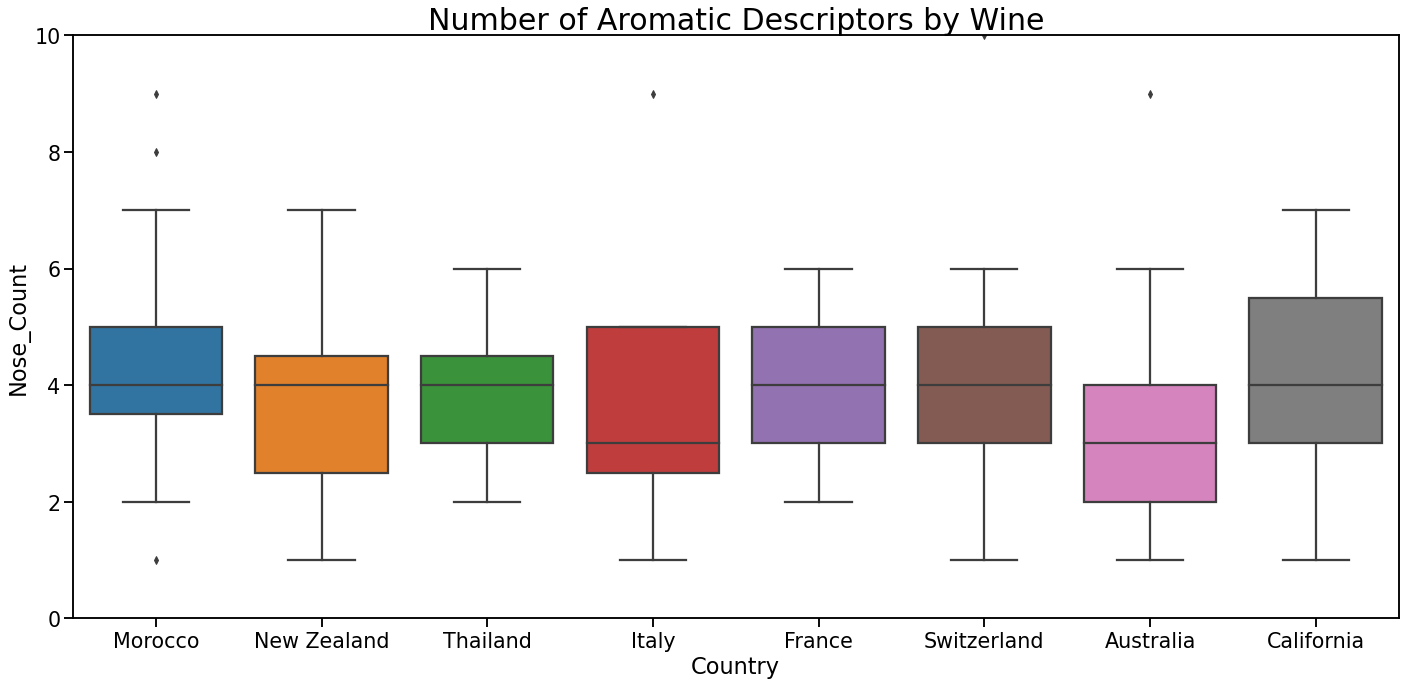

In [9]:
# now I would like to see the same but by wine - focusing on aromatics
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(20,10))  # and set the figure size
plt.title('Number of Aromatic Descriptors by Wine', fontsize='30')  # always a title
ax.set(ylim=(0, 10))  # set the ylim to the same thing for both plots -- makes comparison easier
sns.boxplot(x=df_Nose['Country'], y=df_Nose['Nose_Count'])
plt.tight_layout()

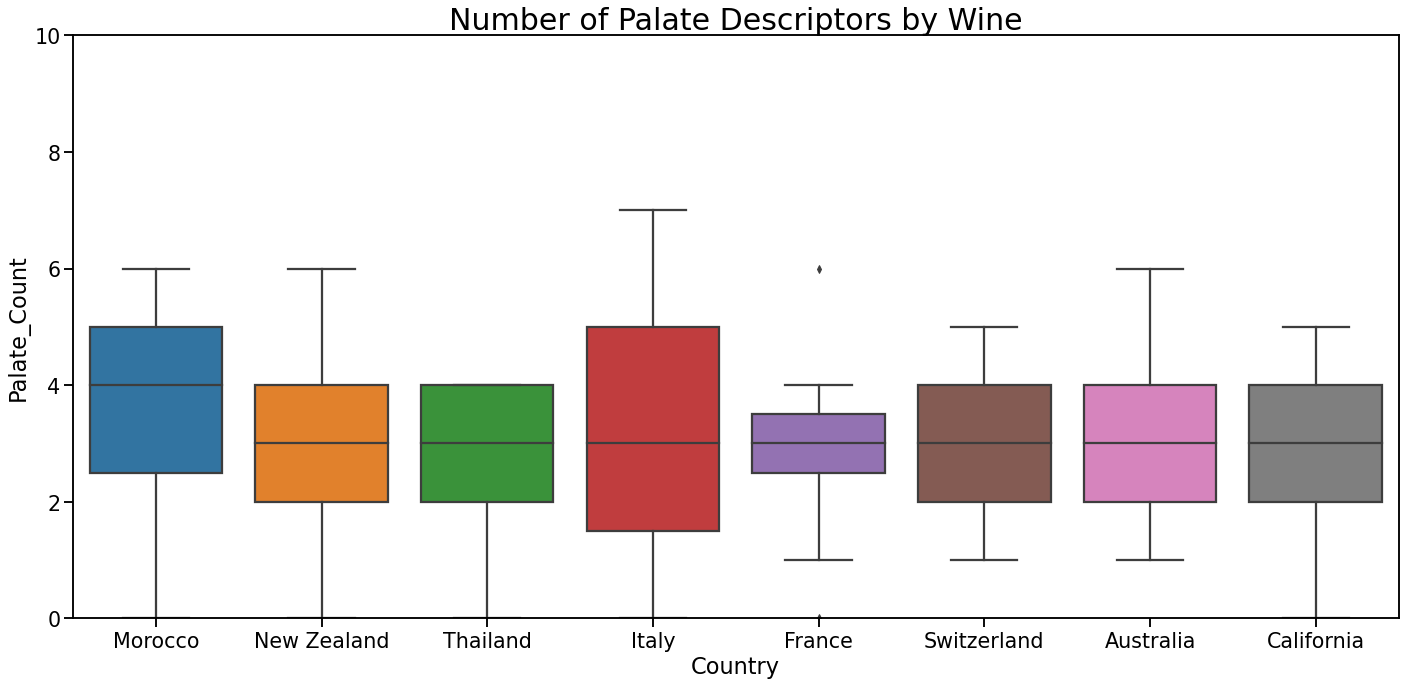

In [10]:
# now I would like to see the same but by wine - focusing on the palate
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(20,10))  # and set the figure size
ax.set(ylim=(0, 10))  # set the ylim to the same thing for both plots -- makes comparison easier
plt.title('Number of Palate Descriptors by Wine', fontsize='30')  # always a title
sns.boxplot(x=df_Palate['Country'], y=df_Palate['Palate_Count'])
plt.tight_layout()

## Analysis of Descriptors

In [11]:
# we need to make a subgroup of our dataframe to look at some desciptive statistics
df_Country_Ns = df_Nose.groupby('Country').sum()  # .sum() creates the dataset using a sum of value counts

In [12]:
df_Country_Ns.head()

,Taster,Wine,Price,Ethanol,Gluc_Fruc,TA,pH,AV,Malic_Acid,Lactic_Acid,...,tree_moss,truffle,mushroom,Wine_Faults,Cork_Taint,Reduction,Heat,VA,Sulfites,Brett
Country,,,,,,,,,,,,,,,,,,,,,
Australia,190,7087,374.3,257.64,3.8,67.26,68.40,9.69,1.9,26.6,...,0,1,0,3,0,1,0,1,1,0
California,190,8607,718.2,248.71,0.0,54.91,73.72,9.31,0.0,45.6,...,0,1,2,7,0,2,0,0,1,2
France,190,18259,760.0,246.43,9.5,56.81,72.01,10.45,0.0,32.3,...,0,0,2,0,0,0,0,0,0,0
Italy,190,15599,608.0,261.25,0.0,64.60,70.11,10.26,0.0,49.4,...,0,0,2,1,0,0,0,1,0,0
Morocco,190,15048,294.5,255.36,9.5,62.32,69.54,8.36,0.0,20.9,...,0,1,1,1,0,0,0,1,0,0


In [13]:
df_Aroma_dscp = df_Country_Ns.drop(labels = ['Taster', 'Wine', 'Price', 'Ethanol', 'Gluc_Fruc', 'TA', 'pH', 'AV', 'Malic_Acid', 'Lactic_Acid', 'IPT', 'Density', 'Correct_Guess'], axis = 1)
df_Aroma_dscp.head()

,Rank,Nose_Count,Fruity,Red_Berries,Stone_Fruits,Fortified,rasberry,blackcurrant,blackberry,cherry,...,tree_moss,truffle,mushroom,Wine_Faults,Cork_Taint,Reduction,Heat,VA,Sulfites,Brett
Country,,,,,,,,,,,,,,,,,,,,,
Australia,95.0,65,15,6,6,1,1,1,2,5,...,0,1,0,3,0,1,0,1,1,0
California,111.0,78,6,0,4,0,0,0,0,2,...,0,1,2,7,0,2,0,0,1,2
France,57.0,73,17,8,4,3,0,0,2,1,...,0,0,2,0,0,0,0,0,0,0
Italy,67.0,69,17,11,2,0,1,0,1,0,...,0,0,2,1,0,0,0,1,0,0
Morocco,76.0,87,33,15,10,1,1,1,6,4,...,0,1,1,1,0,0,0,1,0,0


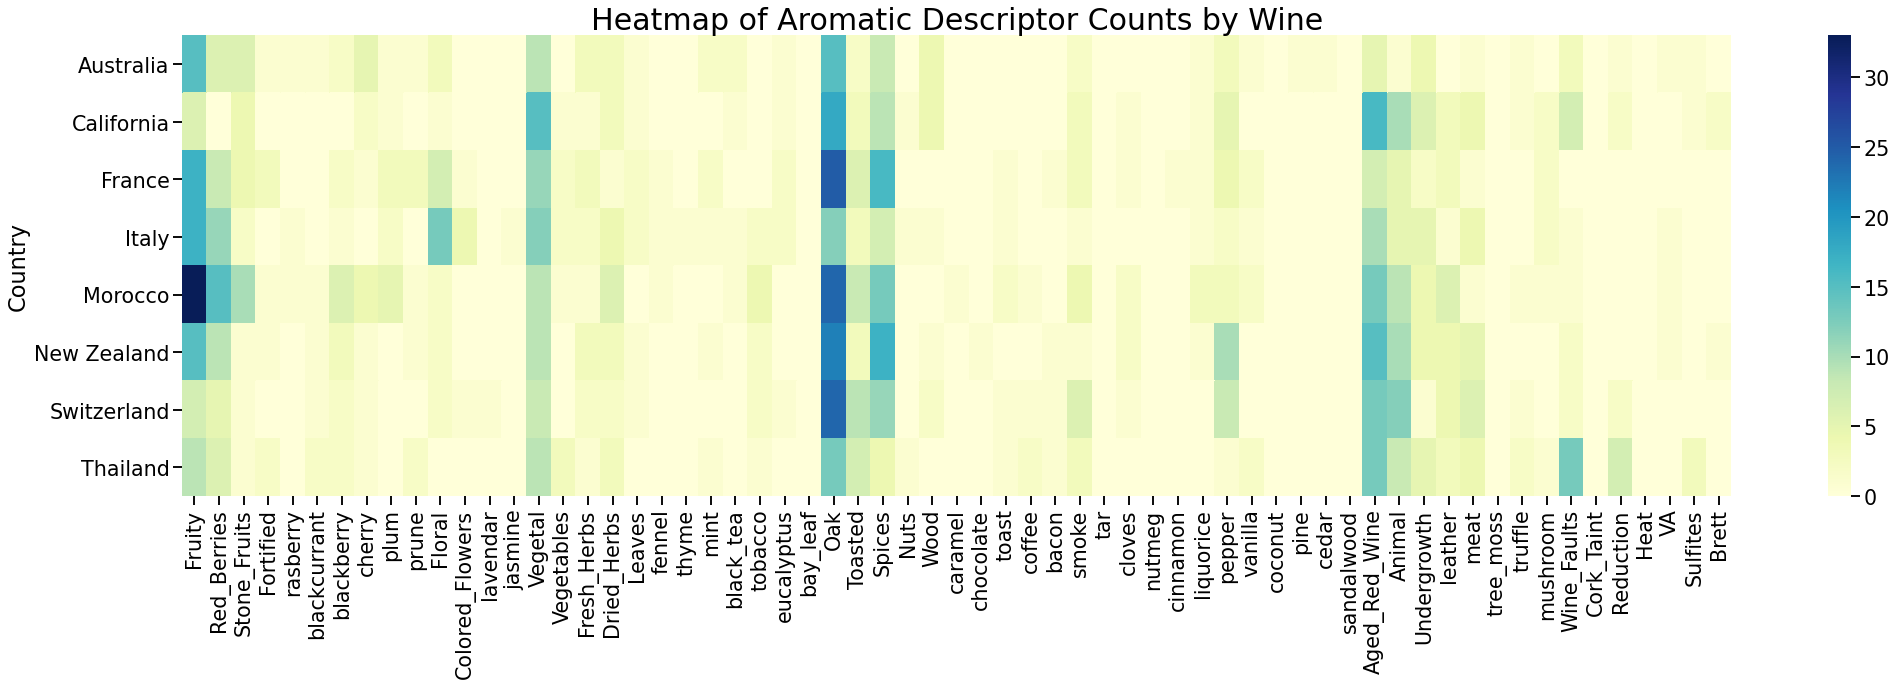

In [14]:
# I want to make a heatmap of the value counts contained within each column of the df
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(30,10))  # and set the figure size
plt.title('Heatmap of Aromatic Descriptor Counts by Wine', fontsize='30')  # always a title
sns.heatmap(df_Aroma_dscp.iloc[:, 2:], annot=False, cmap= "YlGnBu")
plt.tight_layout()

In [15]:
# we can drop all columns that do not contain values in order to make things easier to see
df_Aroma_dscp = df_Aroma_dscp.loc[:, (df_Aroma_dscp != 0).any(axis=0)] 

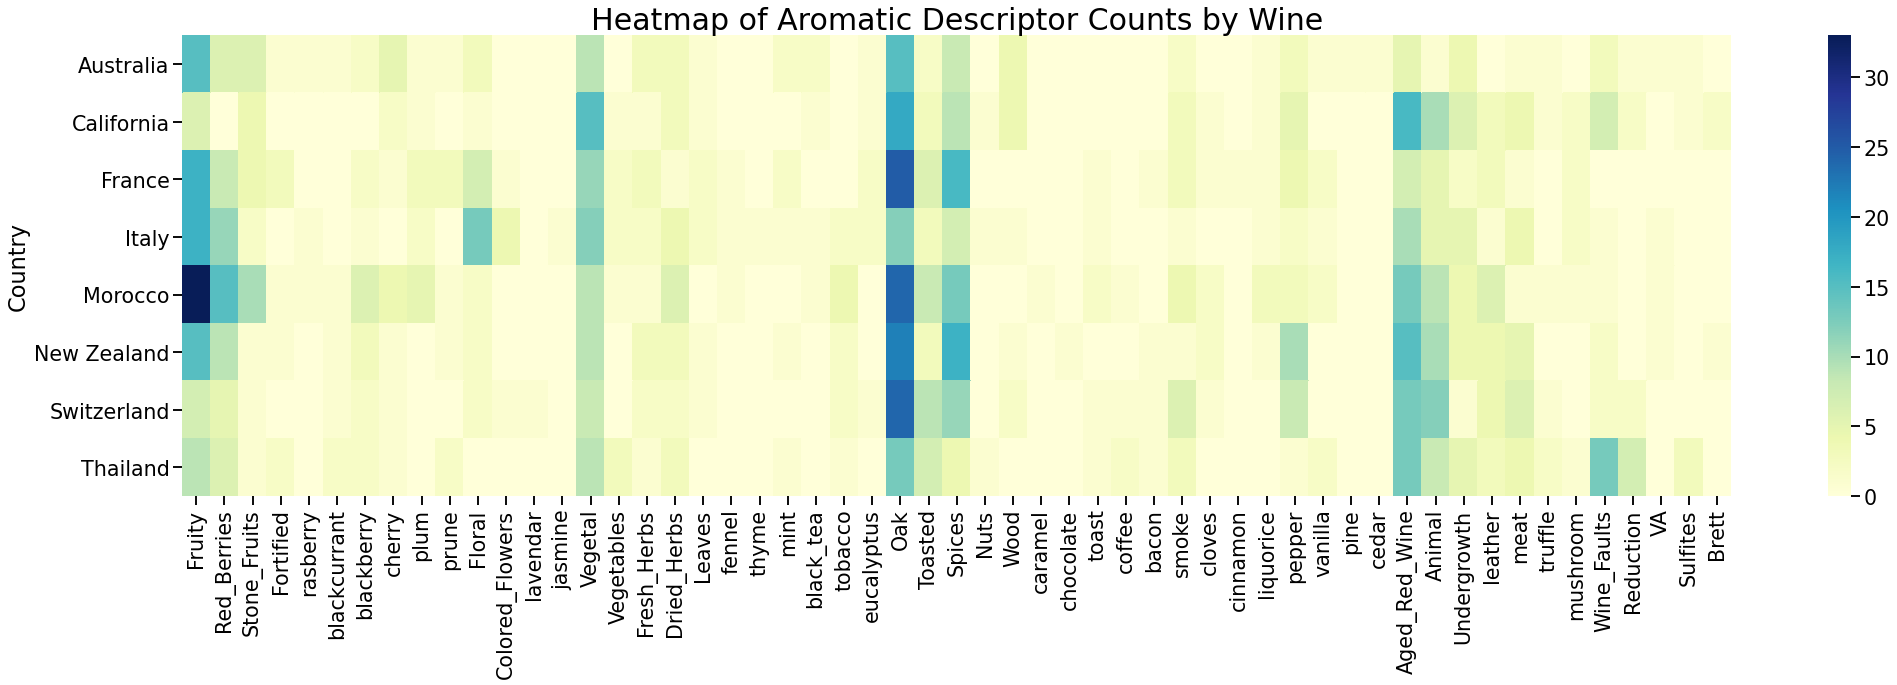

In [16]:
# I want to make a heatmap of the value counts contained within each column of the df
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(30,10))  # and set the figure size
plt.title('Heatmap of Aromatic Descriptor Counts by Wine', fontsize='30')  # always a title
sns.heatmap(df_Aroma_dscp.iloc[:, 2:], annot=False, cmap= "YlGnBu")
plt.tight_layout()

In [17]:
# drop all columns with only 0's from df_Nose
df_Nose = df_Nose.loc[:, (df_Nose != 0).any(axis=0)] 

In [18]:
# now we can use pd.sum funciton to count the total occurences of a term in our dataframe
df_Nose_Count = df_Nose.sum(axis=0, skipna = True)
df_Nose_Count.head()

Taster                                                  1520
Wine                                                   83657
Country    MoroccoNew ZealandThailandItalyFranceSwitzerla...
Price                                                 4455.5
Ethanol                                              1986.07
dtype: object

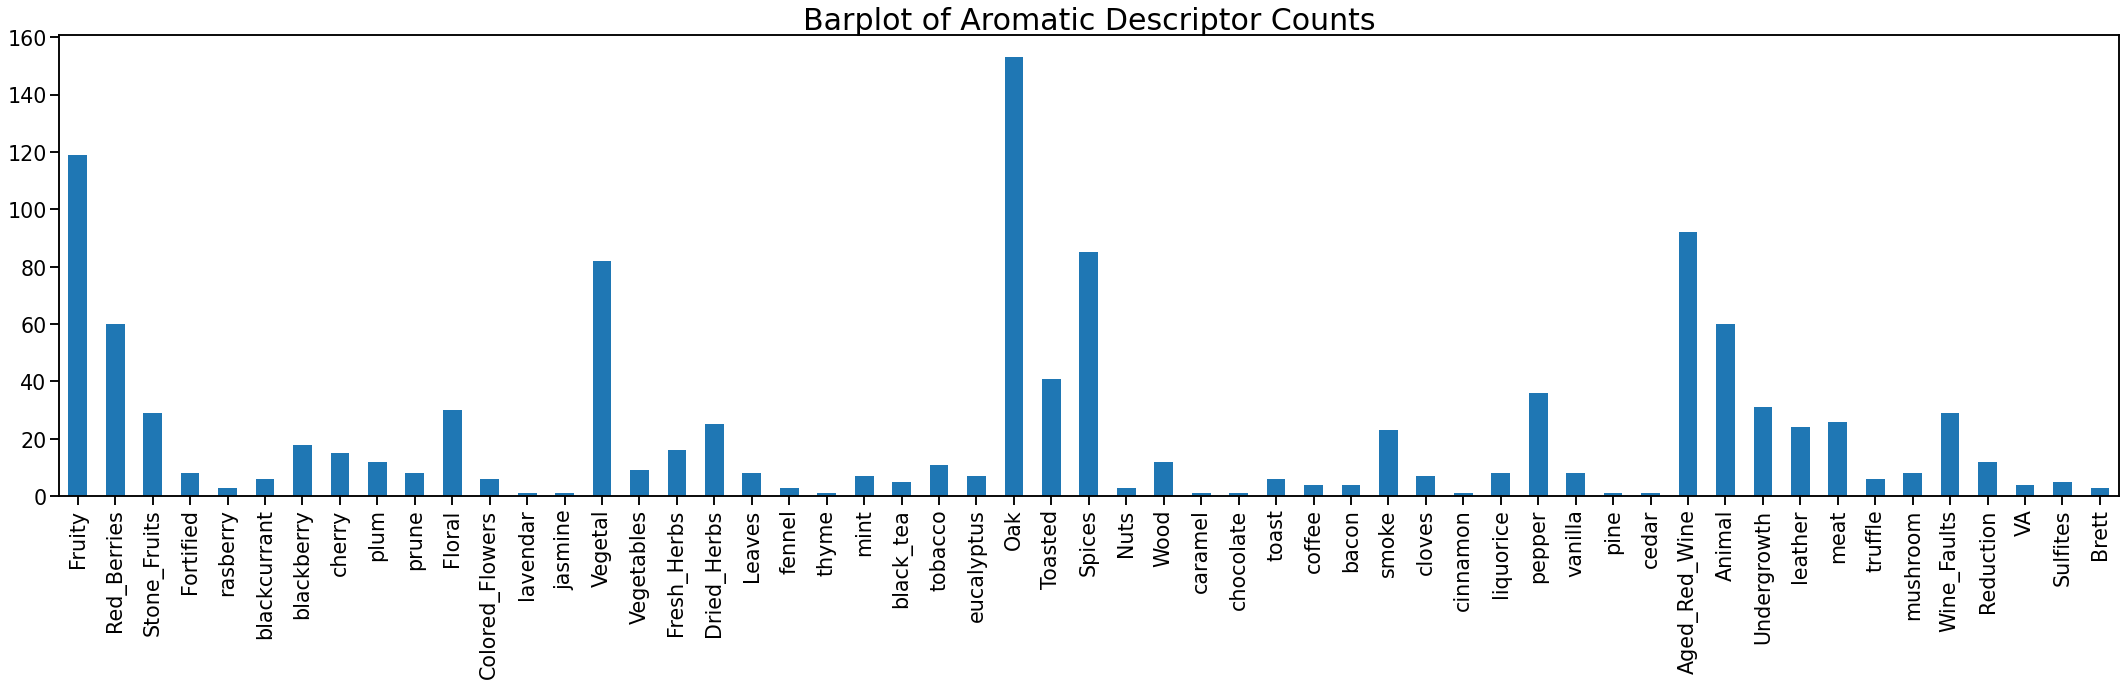

In [19]:
# using matplotlib plot function we can make a simple bargraph of the number of times a term was used
fig, ax = plt.subplots(figsize=(30,10))  # and set the figure size
plt.title('Barplot of Aromatic Descriptor Counts', fontsize='30')  # always a title
df_Nose_Count.iloc[17:].plot.bar()
plt.tight_layout()

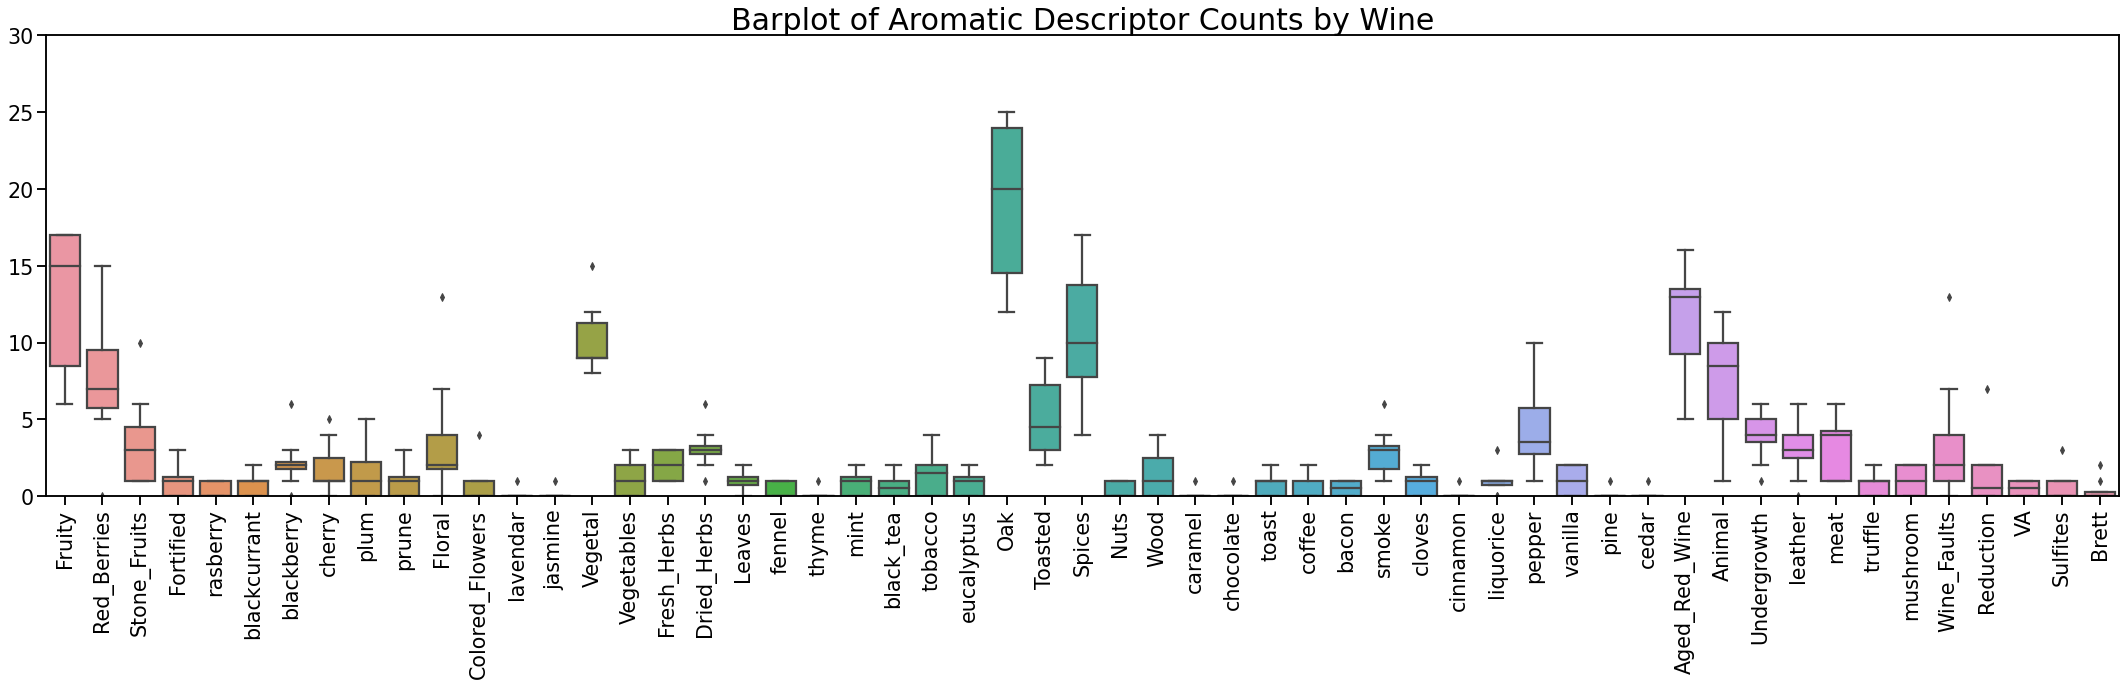

In [20]:
# we can also visualize the data with a simple boxplot
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(30,10))  # and set the figure size
plt.title('Barplot of Aromatic Descriptor Counts by Wine', fontsize='30')  # always a title
ax.set(ylim=(0, 30))  # set the ylim to the same thing for both plots -- makes comparison easier
sns.boxplot(data=df_Aroma_dscp.iloc[:, 2:])
plt.xticks(rotation='vertical')
plt.tight_layout()

In [21]:
# now we can make the same map for the Palate
df_Country_Ps = df_Palate.groupby('Country').sum() # make our initial groupby wine.sum() dataset
# drop unnecessary columns from our grouped dataset
df_Palate_dscp = df_Country_Ps.drop(labels = ['Taster', 'Wine', 'Price', 'Ethanol', 'Gluc_Fruc', 'TA', 'pH', 'AV', 'Malic_Acid', 'Lactic_Acid', 'IPT', 'Density', 'Correct_Guess'], axis = 1)
df_Palate_dscp = df_Palate_dscp.loc[:, (df_Palate_dscp != 0).any(axis=0)] 
df_Palate_dscp.head()

,Rank,Palate_Count,Fruity,Red_Berries,Stone_Fruits,Fortified,rasberry,blackcurrant,blackberry,cherry,...,Aged_Red_Wine,Animal,Undergrowth,leather,meat,truffle,mushroom,Wine_Faults,Sulfites,Brett
Country,,,,,,,,,,,,,,,,,,,,,
Australia,95.0,58,14,4,3,1,1,0,2,2,...,5,4,1,1,3,1,0,0,0,0
California,111.0,59,6,1,3,0,0,1,0,2,...,5,5,0,1,3,0,0,1,0,1
France,57.0,56,10,1,5,1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,0
Italy,67.0,65,14,5,3,1,1,1,1,2,...,2,1,0,0,1,0,0,0,0,0
Morocco,76.0,66,14,9,1,0,2,0,4,0,...,2,0,1,0,0,0,0,0,0,0


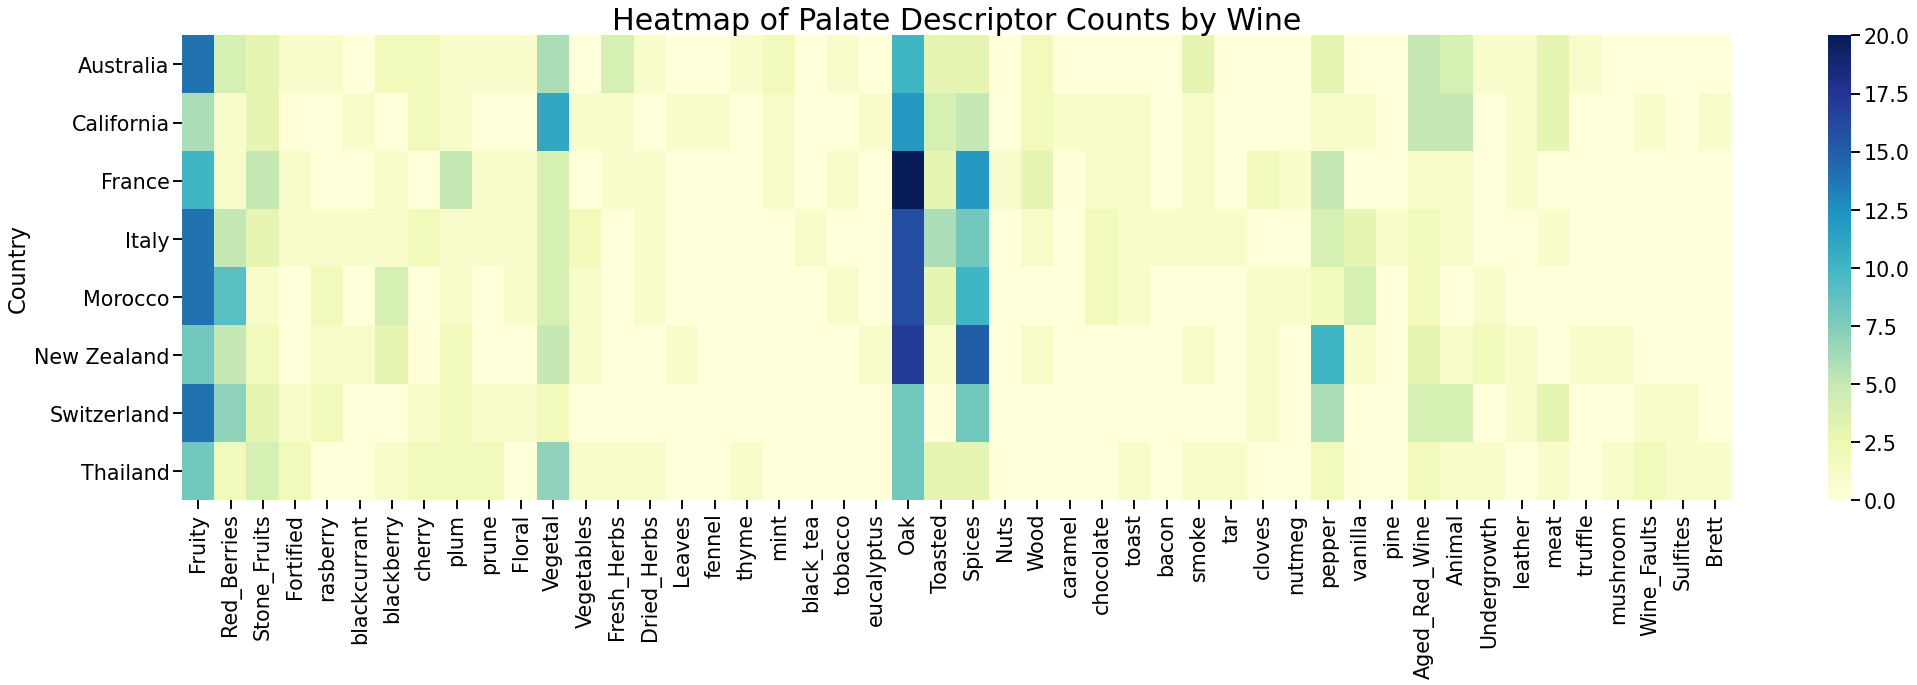

In [22]:
# I want to make a heatmap of the value counts contained within each column of the df
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(30,10))  # and set the figure size
plt.title('Heatmap of Palate Descriptor Counts by Wine', fontsize='30')  # always a title
sns.heatmap(df_Palate_dscp.iloc[:, 2:], annot=False, cmap= "YlGnBu")
plt.tight_layout()

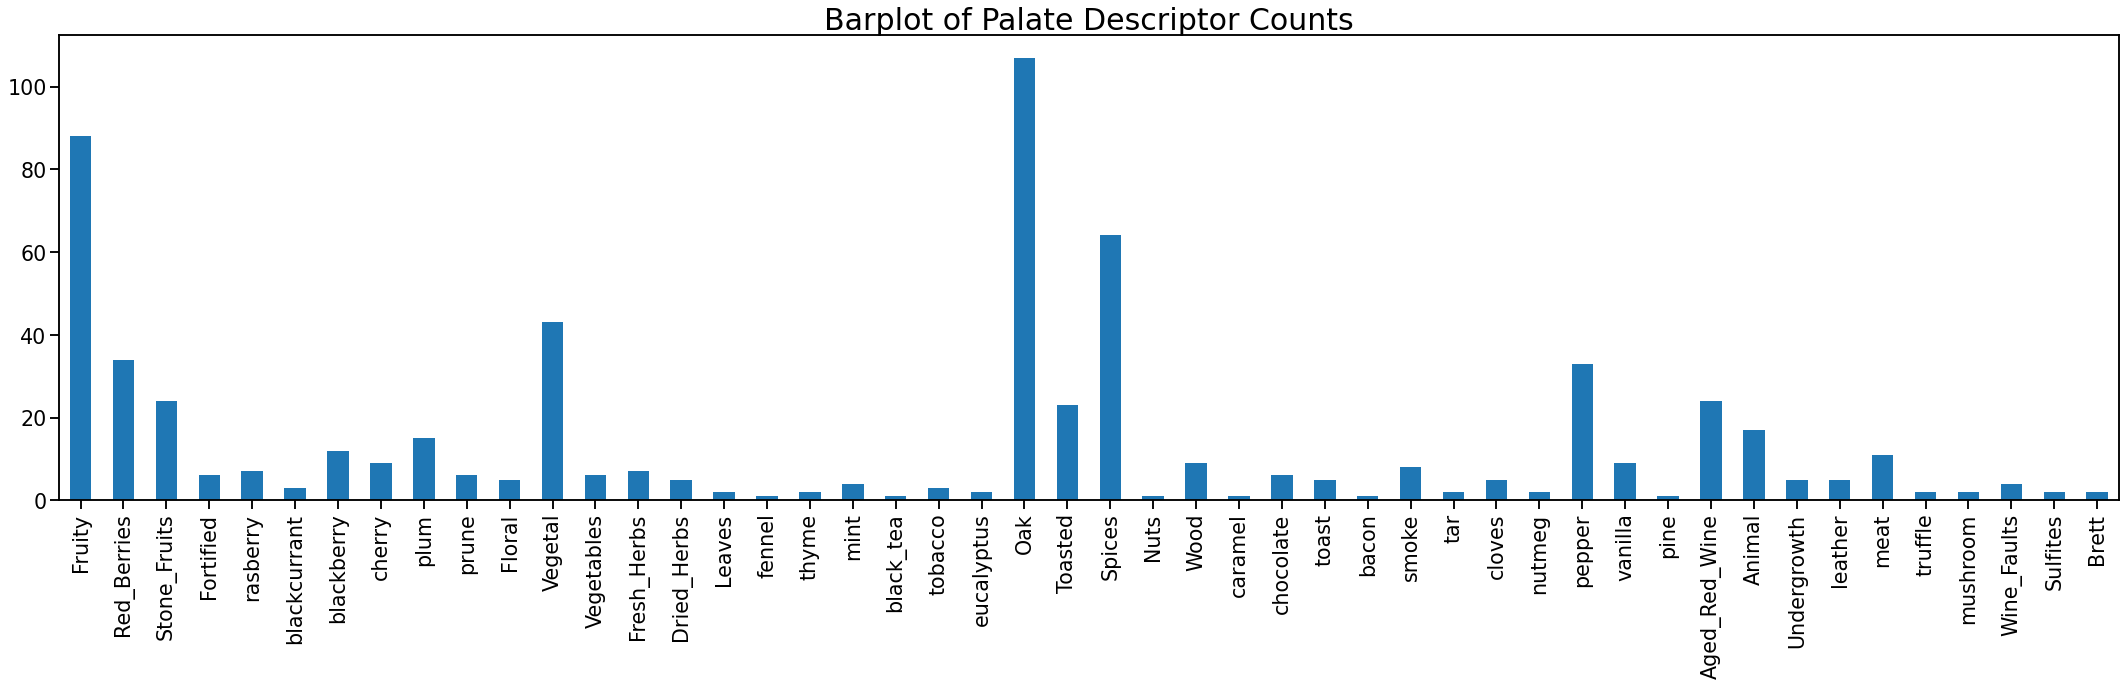

In [23]:
# we can make the same barplot that we made for aroma
df_Palate = df_Palate.loc[:, (df_Palate != 0).any(axis=0)]  # drop all columns with only 0's from df_Nose
df_Palate_Count = df_Palate.sum(axis=0, skipna = True)  # sum all value countsin the columns of df_Palate
# using matplotlib plot function we can make a simple bargraph of the number of times a term was used
fig, ax = plt.subplots(figsize=(30,10))  # and set the figure size
plt.title('Barplot of Palate Descriptor Counts', fontsize='30')  # always a title
df_Palate_Count.iloc[17:].plot.bar()  # plot the bargraph using only desciptive terms
plt.tight_layout()

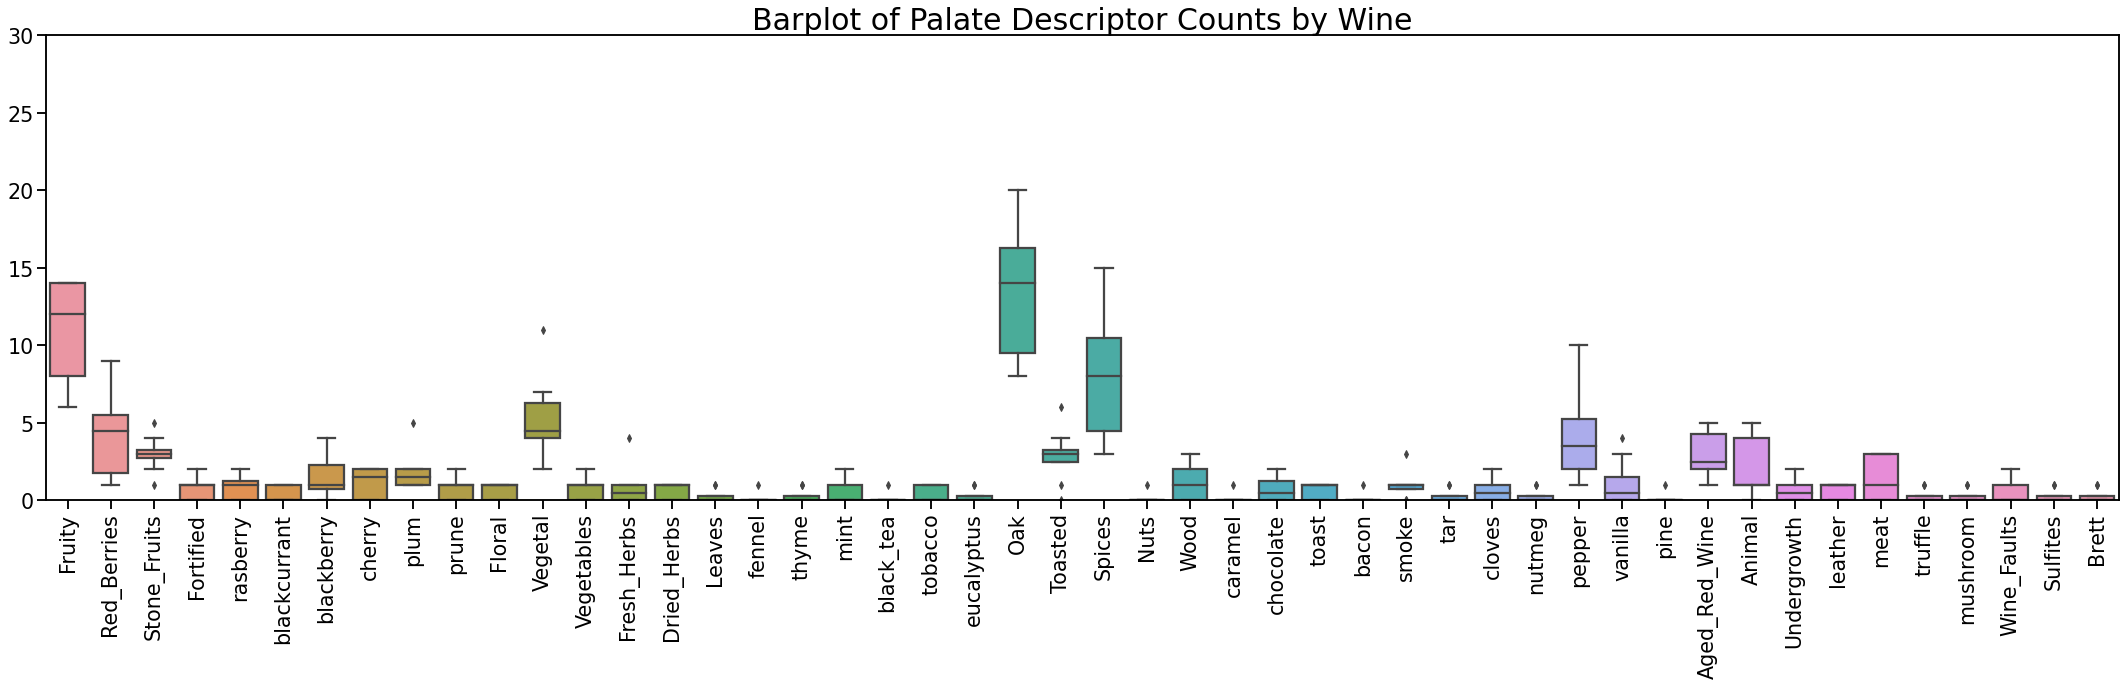

In [24]:
# we can also visualize the data with a simple boxplot
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(30,10))  # and set the figure size
plt.title('Barplot of Palate Descriptor Counts by Wine', fontsize='30')  # always a title
ax.set(ylim=(0, 30))  # set the ylim to the same thing for both plots -- makes comparison easier
sns.boxplot(data=df_Palate_dscp.iloc[:, 2:])
plt.xticks(rotation='vertical')
plt.tight_layout()

## Analysis of Wines

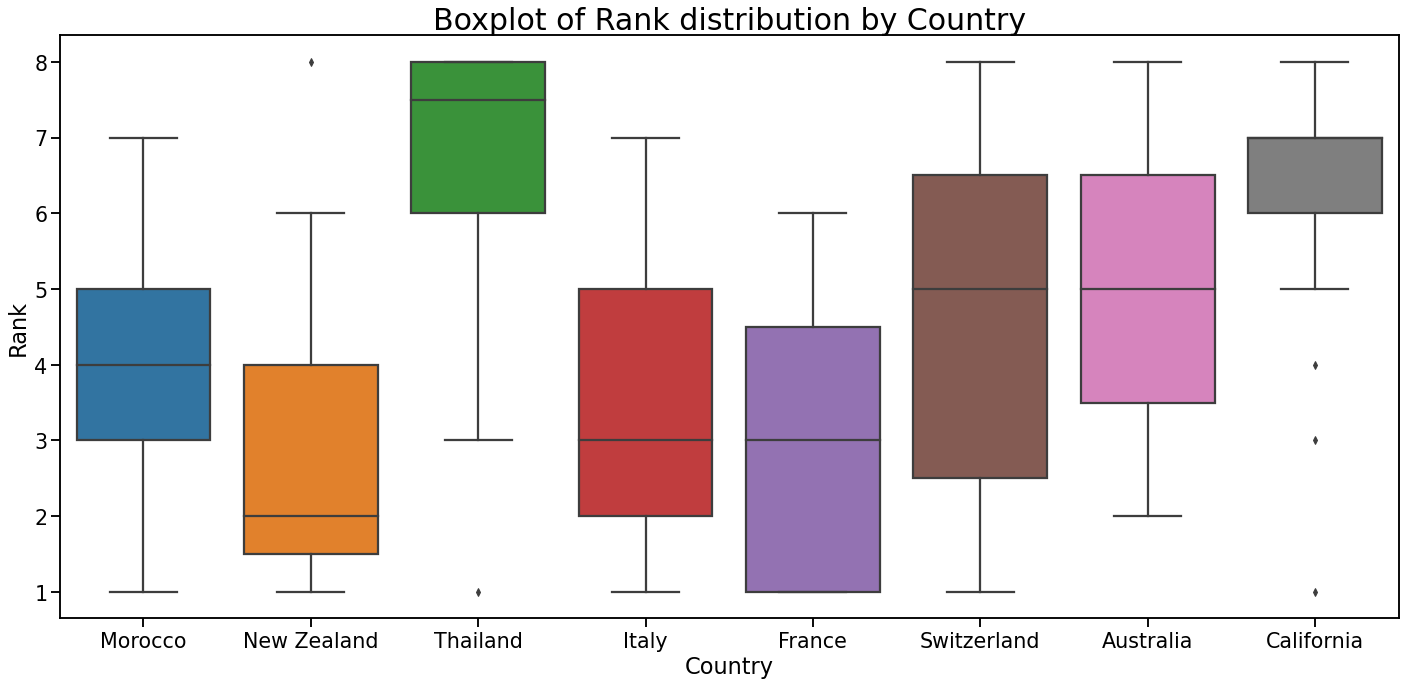

In [25]:
# now we can look at the distribution of ranking by wine
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(20,10))  # and set the figure size
plt.title('Boxplot of Rank distribution by Country', fontsize='30')  # always a title
sns.boxplot(x=df_Nose['Country'], y=df_Nose['Rank'])
plt.tight_layout()

In [26]:
# we are going to make another subgroup to look at another subgroup, defined by mean values
df_Country_m = df_Nose.groupby('Country').mean()  # we compile the mean values into this dataset

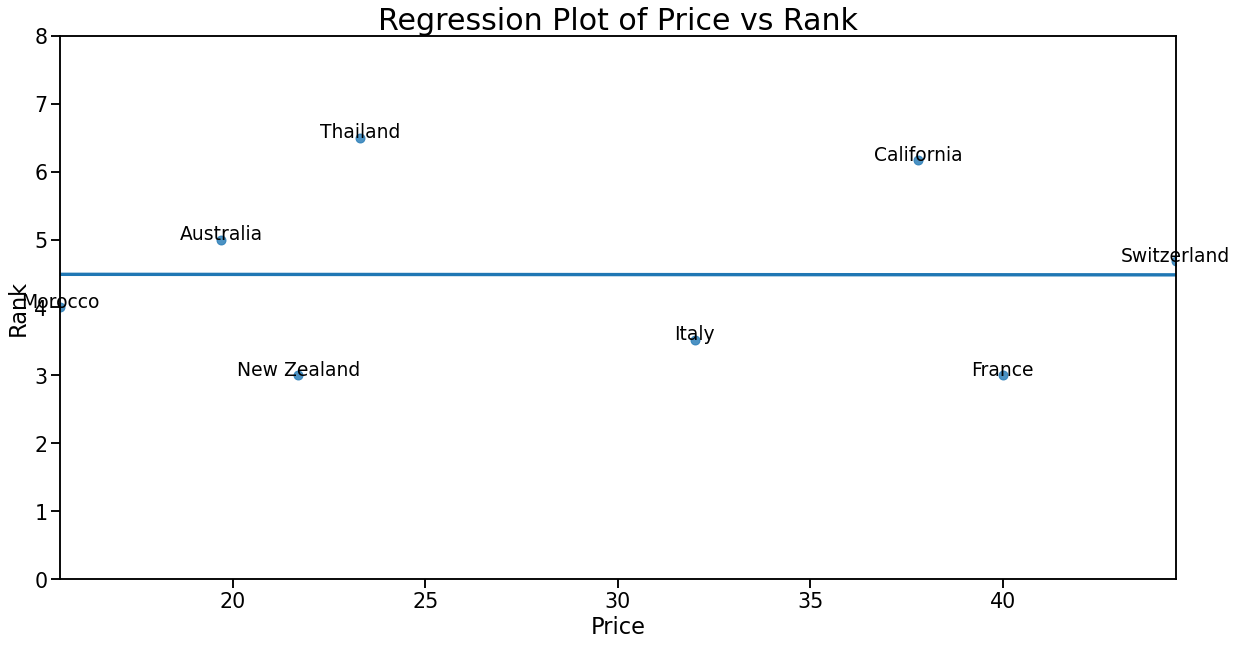

In [27]:
# now we can check the relationship between price and rank
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(20,10))  # and set the figure size
plt.title('Regression Plot of Price vs Rank', fontsize='30')  # always a title
ax.set(ylim=(0, 8))  # set the ylim to the same thing for both plots -- makes comparison easier
sns.regplot(x=df_Country_m['Price'], y=df_Country_m['Rank'], ci=None)
for line in range(0,df_Country_m.shape[0]):
    ax.text(df_Country_m.Price[line], df_Country_m.Rank[line], df_Country_m.index[line], horizontalalignment='center', size='small', color='black')

In [28]:
%%stata -d df_Country_m
reg Rank Price
estimates table, star(.05 .01 .001)


      Source |       SS           df       MS      Number of obs   =         8
-------------+----------------------------------   F(1, 6)         =      0.00
       Model |  .000055418         1  .000055418   Prob > F        =    0.9961
    Residual |  12.7578316         6  2.12630527   R-squared       =    0.0000
-------------+----------------------------------   Adj R-squared   =   -0.1667
       Total |   12.757887         7  1.82255529   Root MSE        =    1.4582

------------------------------------------------------------------------------
        Rank |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       Price |   -.000263   .0515087    -0.01   0.996    -.1263001    .1257742
       _cons |   4.492357    1.59544     2.82   0.031     .5884561    8.396258
------------------------------------------------------------------------------

------------------------------
    Variable |    

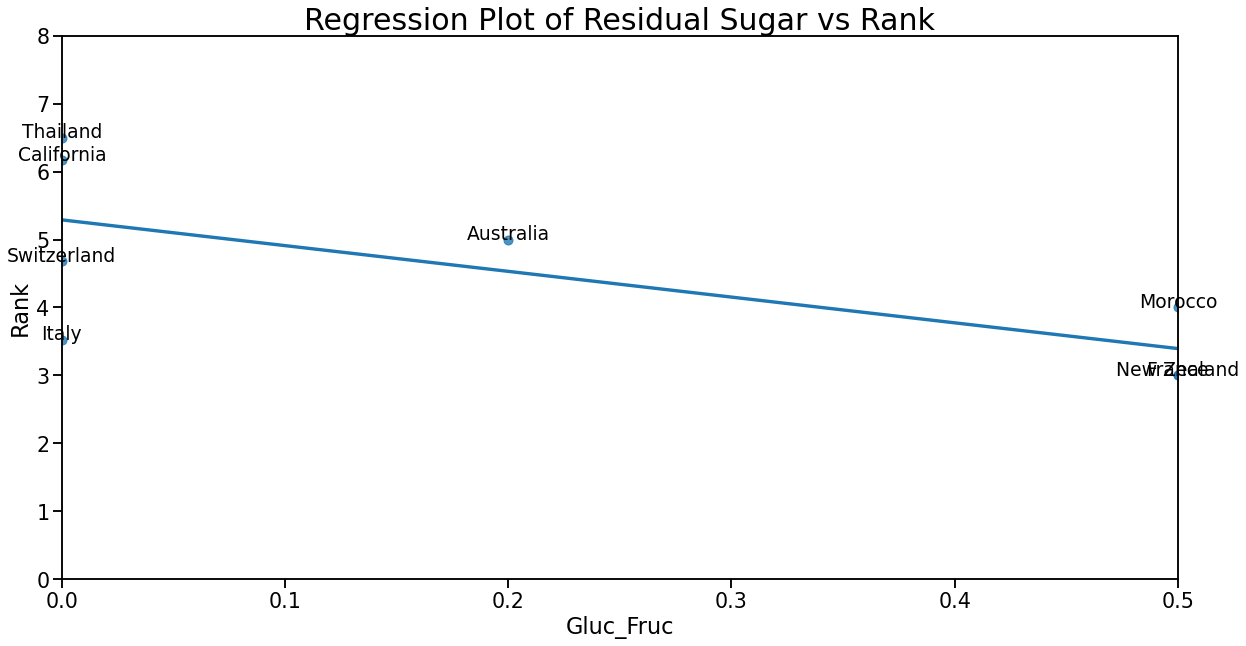

In [29]:
# now we can check the relationship with residual sugar
sns.set_context("talk", font_scale=1.25)  # set up our aesthetics
fig, ax = plt.subplots(figsize=(20,10))  # and set the figure size
plt.title('Regression Plot of Residual Sugar vs Rank', fontsize='30')  # always a title
ax.set(ylim=(0, 8))  # set the ylim to the same thing for both plots -- makes comparison easier
sns.regplot(x=df_Country_m['Gluc_Fruc'], y=df_Country_m['Rank'], ci=None)
for line in range(0,df_Country_m.shape[0]):
    ax.text(df_Country_m.Gluc_Fruc[line], df_Country_m.Rank[line], df_Country_m.index[line], horizontalalignment='center', size='small', color='black')

In [30]:
%%stata -d df_Nose
reg Rank Gluc_Fruc
estimates table, star(.05 .01 .001)


      Source |       SS           df       MS      Number of obs   =       150
-------------+----------------------------------   F(1, 148)       =     24.89
       Model |  112.168004         1  112.168004   Prob > F        =    0.0000
    Residual |  667.091996       148  4.50737835   R-squared       =    0.1439
-------------+----------------------------------   Adj R-squared   =    0.1382
       Total |      779.26       149  5.22993289   Root MSE        =    2.1231

------------------------------------------------------------------------------
        Rank |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   Gluc_Fruc |  -3.731719     .74806    -4.99   0.000    -5.209977   -2.253461
       _cons |   5.263563   .2366362    22.24   0.000     4.795941    5.731186
------------------------------------------------------------------------------

------------------------------
    Variable |    

## Random Forest Model

In [31]:
# load packages we will need for our machine learning model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
# explanationn of a random forest model

In [33]:
df_Nose_RF = df_Nose.drop(['Taster'], axis=1)

In [34]:
# the first thing that we will need to do is use a label encoder so that our model can work with strings
from sklearn import preprocessing  # import the label encoder
le = preprocessing.LabelEncoder()  # name the label encoder

df_Nose_en = df_Nose_RF.apply(le.fit_transform)  # create a new label encoded dataframe for our df_Nose
df_Nose_en.head()

,Wine,Country,Price,Ethanol,Gluc_Fruc,TA,pH,AV,Malic_Acid,Lactic_Acid,...,Undergrowth,leather,meat,truffle,mushroom,Wine_Faults,Reduction,VA,Sulfites,Brett
0,5,4,0,5,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,2,2,2,7,1,6,0,3,...,0,0,0,0,0,0,0,0,0,0
2,0,7,3,0,0,6,4,5,0,6,...,0,0,0,0,0,1,1,0,0,0
3,6,3,4,7,0,3,3,3,0,5,...,2,0,0,0,0,0,0,0,0,0
4,7,2,6,3,2,1,5,4,0,2,...,1,0,0,0,1,0,0,0,0,0


In [35]:
df_Nose.shape

(152, 72)

In [36]:
# seed the random forest model
np.random.seed(0)

In [37]:
# we are going to target the Rank of each wine -- i.e. which features play the most importance in determining rank
X = df_Nose_en.drop(['Rank'], axis=1)
y = df_Nose_en['Rank']
y_title = df_Nose_en['Rank']

In [38]:
# now seperate into training and target data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size = 0.8)

In [39]:
# now build the random forest model using 60 estimators
nose_model_rf = RandomForestClassifier(n_estimators=60)

In [40]:
# train the model
nose_model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60)

In [41]:
# test the model
y_nose_rf = nose_model_rf.predict(X_test)

In [42]:
acc1 = accuracy_score(y_test, y_nose_rf)
print(acc1)

0.22580645161290322


In [43]:
mat = confusion_matrix(y_test, y_nose_rf)
mat

array([[1, 1, 1, 0, 0, 0, 0, 0, 0],
       [2, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 2, 2, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 2, 1, 0],
       [1, 0, 0, 1, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0]])

<AxesSubplot:>

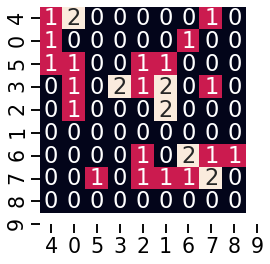

In [44]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=y_title.unique(), yticklabels=y_title.unique())

In [45]:
'''n_features=nose_model_rf.n_features_
plt.figure(figsize = (10,20))
plt.barh(np.arange(n_features), nose_model_rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.tight_layout()'''

'n_features=nose_model_rf.n_features_\nplt.figure(figsize = (10,20))\nplt.barh(np.arange(n_features), nose_model_rf.feature_importances_, align=\'center\')\nplt.yticks(np.arange(n_features), X_train.columns)\nplt.xlabel("Feature importance")\nplt.ylabel("Feature")\nplt.ylim(-1, n_features)\nplt.tight_layout()'

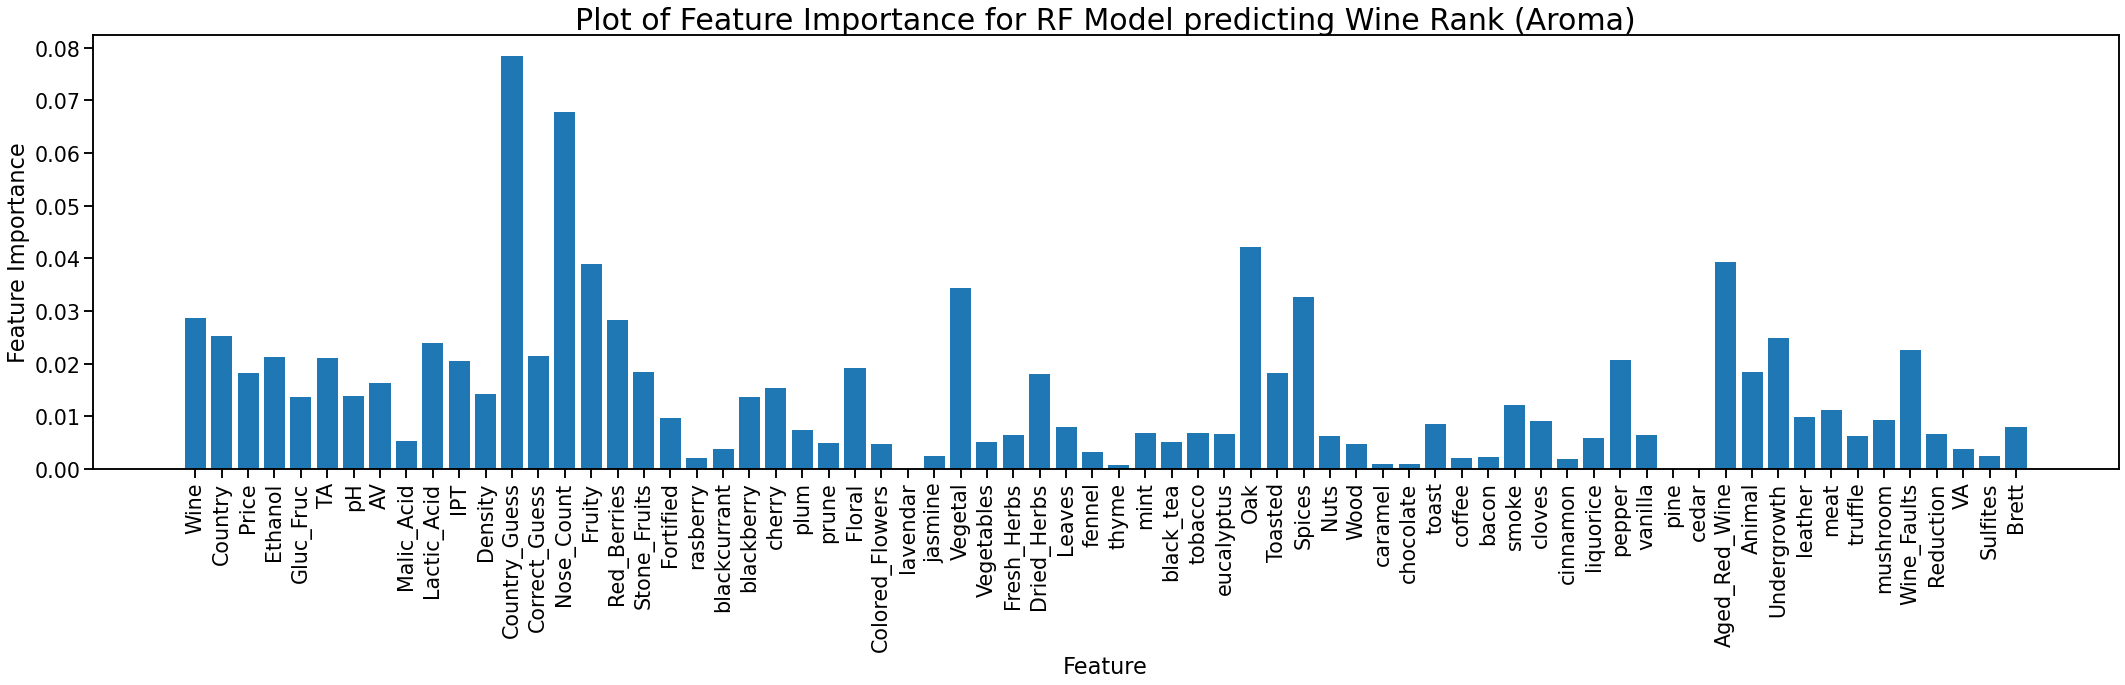

In [46]:
n_features=nose_model_rf.n_features_
plt.figure(figsize = (30,10))
plt.bar(np.arange(n_features), nose_model_rf.feature_importances_)
plt.xticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.xticks(rotation='vertical')
plt.title('Plot of Feature Importance for RF Model predicting Wine Rank (Aroma)', fontsize='30')
plt.tight_layout()

In [47]:
sum(nose_model_rf.feature_importances_) #to make sure features sum to 100%

1.0000000000000007

In [48]:
# now we can drop less important features and see if we can improve the models accuracy
from sklearn.feature_selection import SelectFromModel
feat_labels = list(X.columns.values)

In [49]:
# show the number of features that really drive the model
feat_imp = []
sfm = SelectFromModel(nose_model_rf, threshold=0.025)
sfm.fit(X_train, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])
    feat_imp.append(feat_labels[feature_list_index])
print('Number of Total features: ' +str(len(feat_labels)))
print('Number of important features: ' +str(len(feat_imp)))

Wine
pH
Lactic_Acid
IPT
Country_Guess
Correct_Guess
Nose_Count
Fruity
Red_Berries
Vegetal
Oak
Spices
Aged_Red_Wine
Undergrowth
Number of Total features: 70
Number of important features: 14


In [50]:
# now let's remake the model with only the important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [51]:
clf_important = RandomForestClassifier(n_estimators=60, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=60, n_jobs=-1, random_state=0)

In [52]:
y_important_pred = clf_important.predict(X_important_test)
acc2 = accuracy_score(y_test, y_important_pred)

In [53]:
# compare the accuracy of the two models
print(acc1)
print(acc2)

0.22580645161290322
0.25806451612903225


<AxesSubplot:>

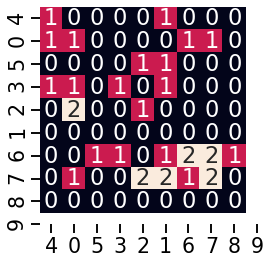

In [54]:
mat = confusion_matrix(y_test, y_important_pred)
mat
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=y_title.unique(), yticklabels=y_title.unique())

In [55]:
df_Palate_RF = df_Palate.drop(['Taster'], axis=1)

In [56]:
# now we can run the same RF model but this time for palate
df_Palate_en = df_Palate_RF.apply(le.fit_transform)  # create a new label encoded dataframe for our df_Nose

X_2 = df_Palate_en.drop(['Rank'], axis=1)  #we are going to try and predict Rank of the palate df
y_2 = df_Palate_en['Rank']
y_title_2 = df_Palate_en['Rank']

#seperate into training and testing data
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, train_size = 0.8)

# now build the random forest model using 60 estimators
palate_model_rf = RandomForestClassifier(n_estimators=60)
palate_model_rf.fit(X2_train, y2_train)  # train the model
y_palate_rf = palate_model_rf.predict(X2_test)  # test the model
acc_palate = accuracy_score(y2_test, y_palate_rf)  # test the accuracy
print(acc_palate)

0.12903225806451613


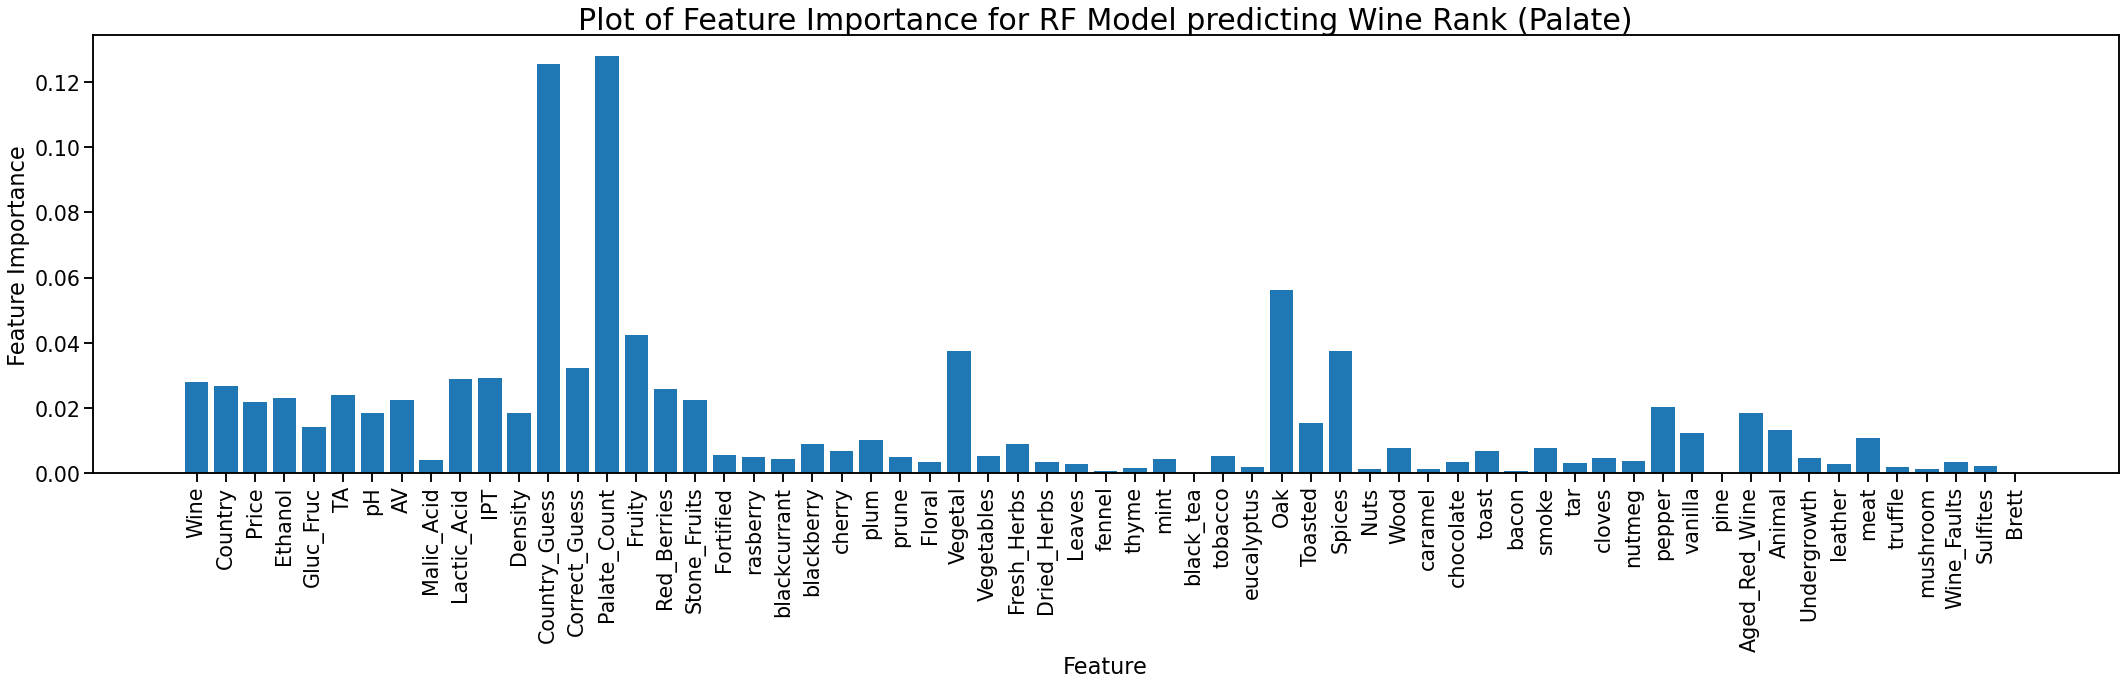

In [57]:
# make a plot of the important features
n_features_palate=palate_model_rf.n_features_
plt.figure(figsize = (30,10))
plt.bar(np.arange(n_features_palate), palate_model_rf.feature_importances_)
plt.xticks(np.arange(n_features_palate), X2_train.columns)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.xticks(rotation='vertical')
plt.title('Plot of Feature Importance for RF Model predicting Wine Rank (Palate)', fontsize='30')
plt.tight_layout()

In [58]:
# now we can drop less important features and see if we can improve the models accuracy
feat_labels = list(X_2.columns.values)

# show the number of features that really drive the model
feat_imp2 = []
sfm2 = SelectFromModel(palate_model_rf, threshold=0.04)
sfm2.fit(X2_train, y2_train)
for feature_list_index in sfm2.get_support(indices=True):
    print(feat_labels[feature_list_index])
    feat_imp2.append(feat_labels[feature_list_index])
print('Number of Total features: ' +str(len(feat_labels)))
print('Number of important features: ' +str(len(feat_imp2)))

Country_Guess
Palate_Count
Fruity
Oak
Spices
Number of Total features: 63
Number of important features: 5


In [59]:
# lets rerun the model with only the important features
X_important_train = sfm2.transform(X2_train)
X_important_test = sfm2.transform(X2_test)

# keep only information that is classified as important
clf_important = RandomForestClassifier(n_estimators=60, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y2_train)

y_important_pred = clf_important.predict(X_important_test)
acc_palate_2 = accuracy_score(y2_test, y_important_pred)

# compare the accuracy of the two models
print(acc_palate)
print(acc_palate_2)

0.12903225806451613
0.25806451612903225
